---
## Multiple linear regression practice <br> <font size=3.4> Dataset:50_Startups.csv<br><font size=2>Dataset= cars, all steps of multiple linear regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [9]:
cars = pd.read_csv("/Users/Ketan/Data Science/Datasets/Toyoto_Corrola.csv")

In [11]:
cars.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [34]:
cars_cl = cars.drop(cars.iloc[:,:2], axis=1) 

In [35]:
cars_cl.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


In [36]:
cars_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Cylinders  1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [37]:
cars_cl.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [38]:
cars_cl.shape

(1436, 8)

In [39]:
cars_cl.dtypes

Price        int64
Age_08_04    int64
KM           int64
HP           int64
Doors        int64
Cylinders    int64
Gears        int64
Weight       int64
dtype: object

In [40]:
cars_cl.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears',
       'Weight'],
      dtype='object')

In [42]:
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=cars_cl).fit()

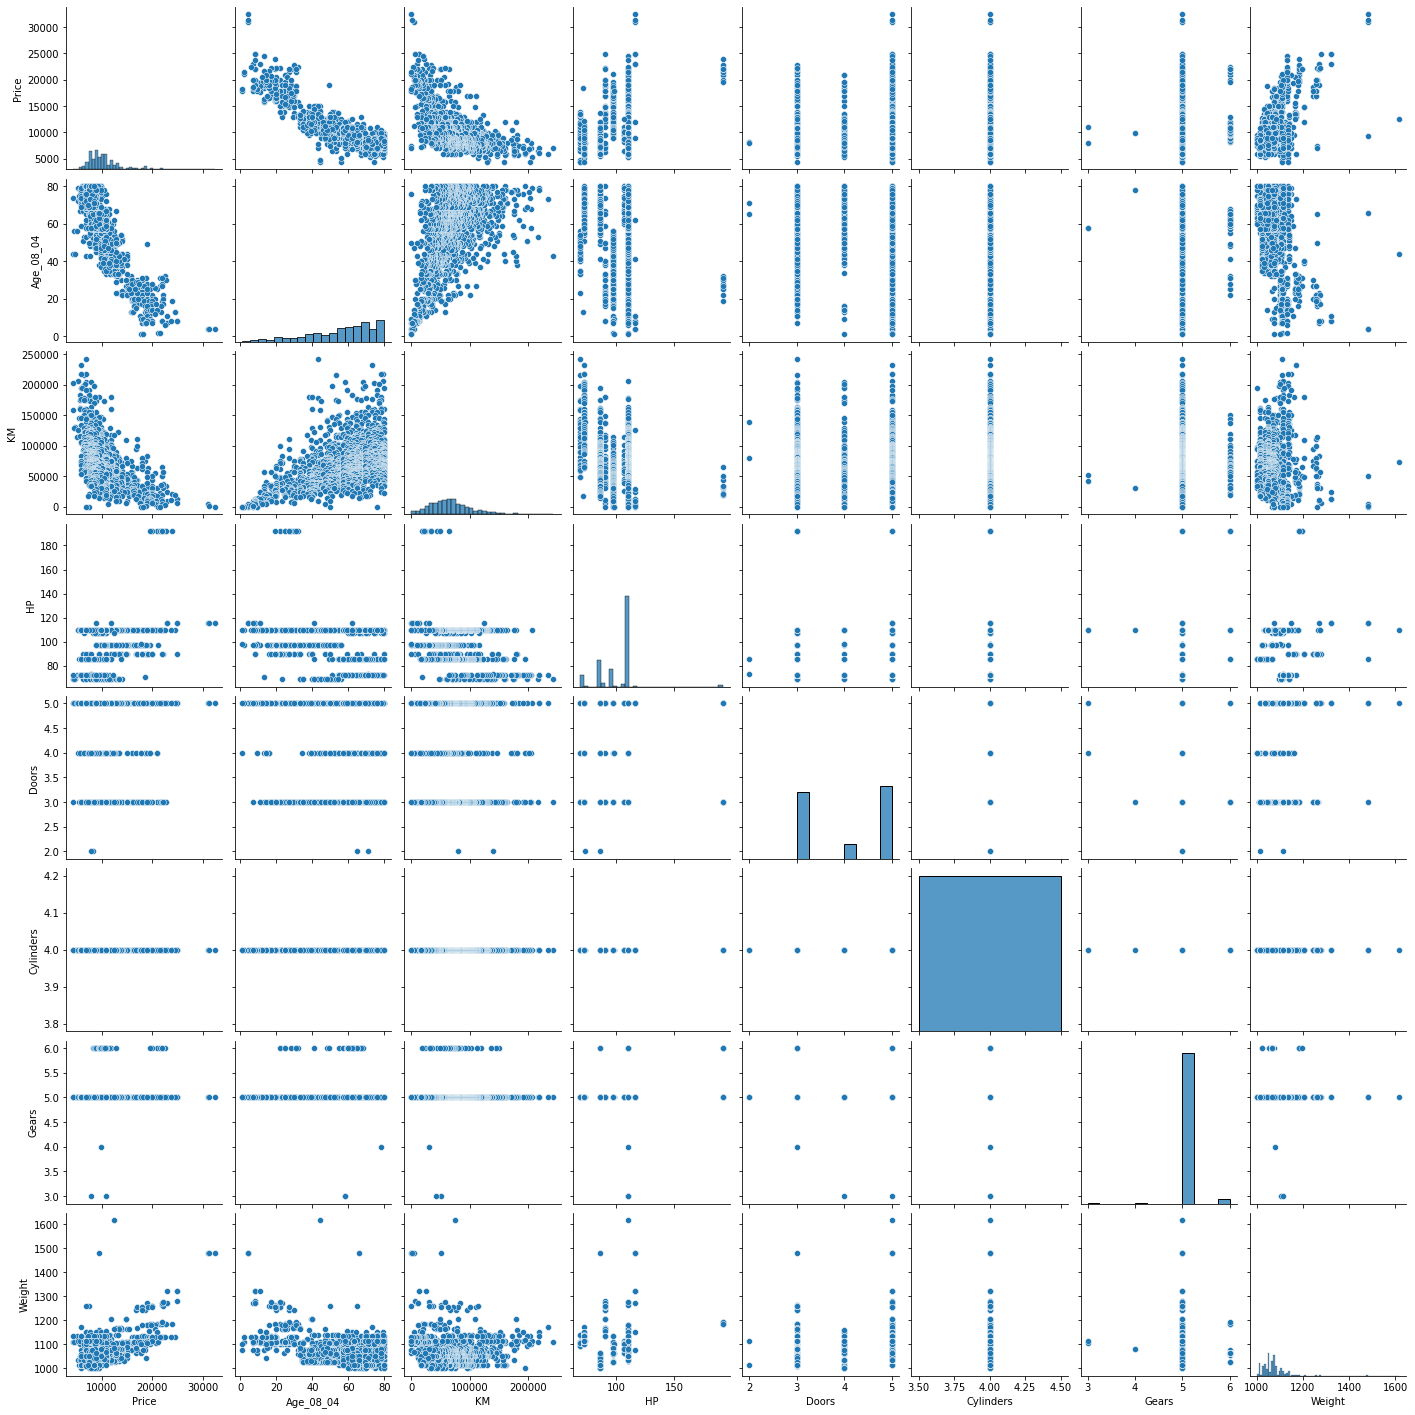

In [74]:
sns.pairplot(cars_cl)

In [47]:
model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [48]:
model.pvalues

Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64

In [50]:
model.tvalues

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64

In [52]:
model.rsquared

0.8628024511073656

In [54]:
model.rsquared_adj

0.8622263942190831

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Fri, 01 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:08:52   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.8455     77.179     -5.323      0.000    -562.241    -259.450
Age_08_04   -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Cylinders  -1643.3820    308.714     -5.323      0.000   -2248.964   -1037.800
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     4.86e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.72e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
model_test1 = smf.ols ('Price~Doors', data=cars_cl).fit()

In [61]:
model_test1.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [63]:
model_test1.rsquared

0.03434555943109785

In [65]:
model_test1.rsquared_adj

0.03367216023962727

In [67]:
cars_cl.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears',
       'Weight'],
      dtype='object')

In [ ]:
rsq_1 = smf.ols ('Age_08_04~KM+HP+Doors+Cylinders+Gears+Weight',data=cars_cl).fit().rsquared  
vif_1 = 1/(1-rsq_1) 

rsq_2 = smf.ols ('KM~Age_08_04+HP+Doors+Cylinders+Gears+Weight',data=cars_cl).fit().rsquared  
vif_2 = 1/(1-rsq_2) 

rsq_3 = smf.ols ('HP~Age_08_04+KM+Doors+Cylinders+Gears+Weight',data=cars_cl).fit().rsquared  
vif_3 = 1/(1-rsq_3) 

rsq_4 = smf.ols ('Doors~Age_08_04+KM+HP+Cylinders+Gears+Weight',data=cars_cl).fit().rsquared  
vif_4 = 1/(1-rsq_4)

rsq_5 = smf.ols ('Cylinders~Age_08_04+KM+HP+Doors+Gears+Weight',data=cars_cl).fit().rsquared  
vif_5 = 1/(1-rsq_5)

rsq_6 = smf.ols ('Gears~Age_08_04+KM+HP+Doors+Cylinders+Weight',data=cars_cl).fit().rsquared  
vif_6 = 1/(1-rsq_6)

rsq_7 = smf.ols ('Weight~Age_08_04+KM+HP+Doors+Cylinders+Gears',data=cars_cl).fit().rsquared  
vif_7 = 1/(1-rsq_7)

# Storing vif values in a data frame
df1 = {'Variables': ['Age_08_04','KM','HP','Doors','Cylinders','Gears','Weight'],
        'VIF':[vif_1,vif_2,vif_3,vif_4,vif_5,vif_6,vif_7]}
Vif_frame = pd.DataFrame(df1)  
Vif_frame



In [75]:
cars_cl.corr()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


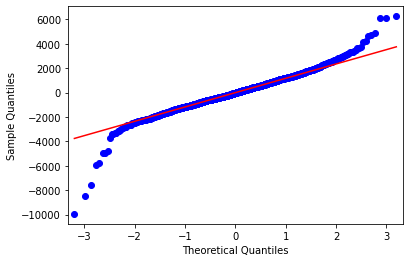

In [84]:
 import statsmodels.api as sm
 qqplot=sm.qqplot(model.resid,line='q')

In [86]:
qqplot.get_size_inches()

array([6., 4.])

In [88]:
qqplot.set_size_inches(15,4)

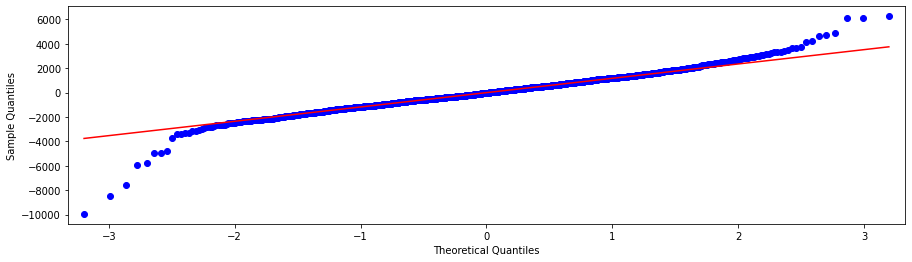

In [89]:
qqplot

In [90]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

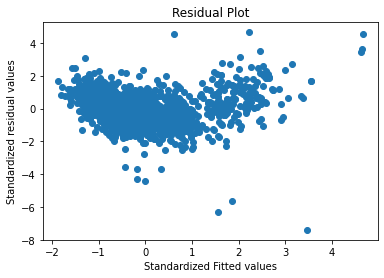

In [92]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

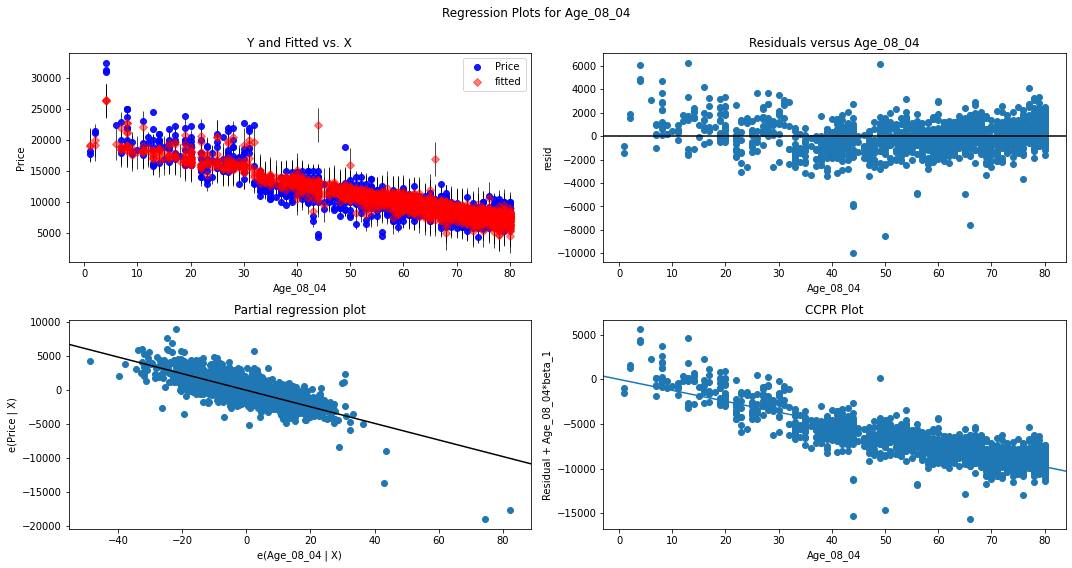

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

In [96]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

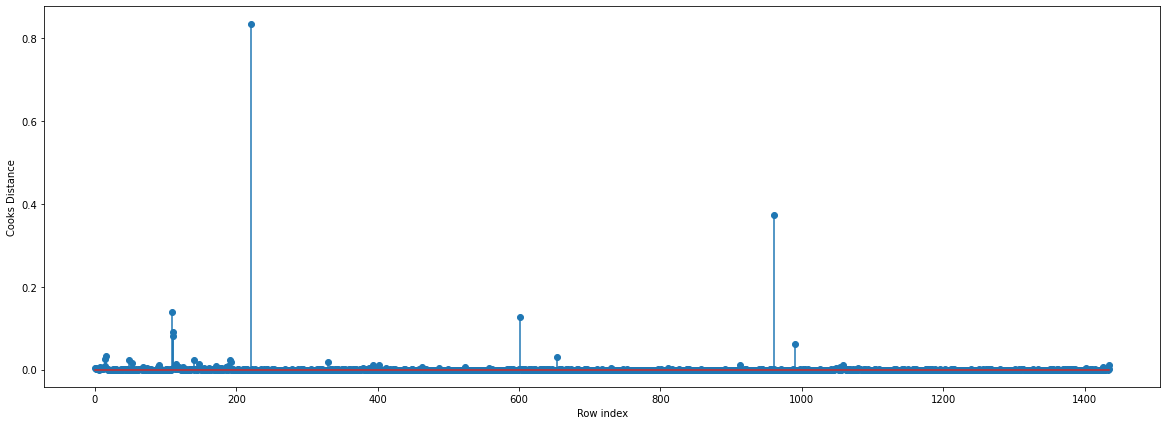

In [99]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars_cl)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [100]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.8359007508853962)

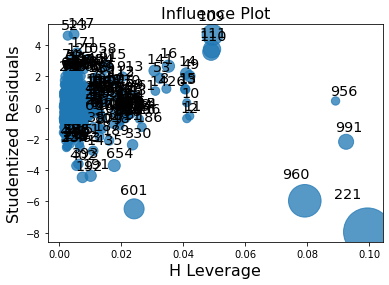

In [101]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [104]:
k = cars_cl.shape[1]
n = cars_cl.shape[0]
leverage_cutoff = 3*((k + 1)/n)